Total families: 571
Total individuals: 3021
Total images: 15845

Family-wise statistics:
       Num_Individuals  Num_Images
count       571.000000  571.000000
mean          5.290718   27.749562
std           2.709224   38.784316
min           2.000000    3.000000
25%           4.000000   18.000000
50%           5.000000   23.000000
75%           6.000000   31.000000
max          41.000000  883.000000

Individual-wise statistics:
        Num_Images
count  3021.000000
mean      5.244952
std       5.220081
min       0.000000
25%       2.000000
50%       4.000000
75%       7.000000
max     109.000000


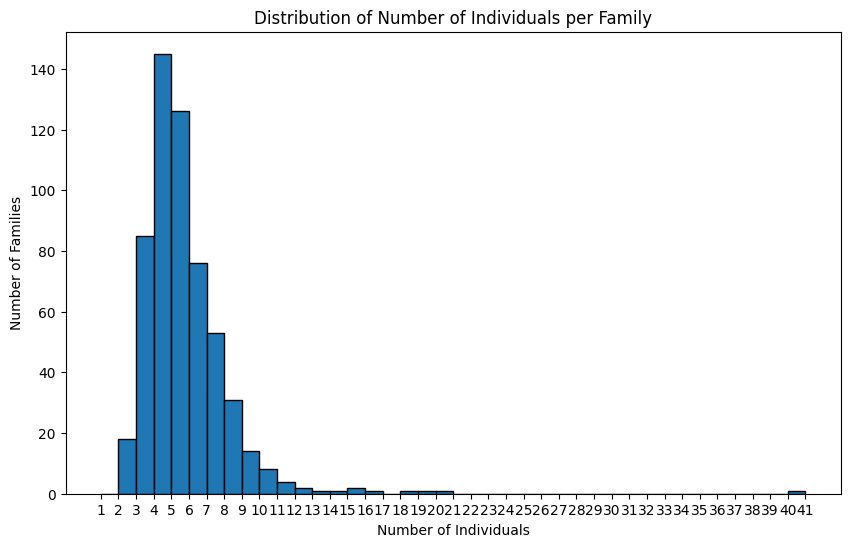

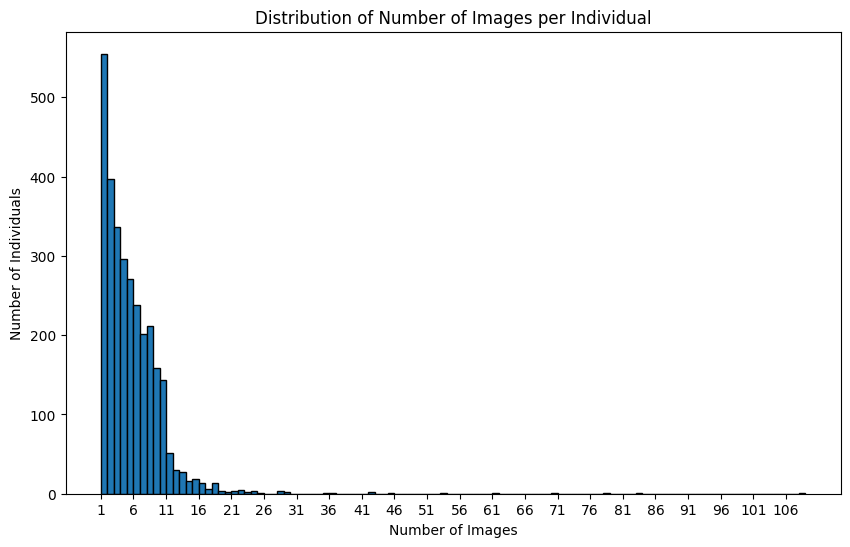

In [1]:
import os
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

# Define the path to your dataset
DATASET_PATH = '../data/raw/fiw/train/train-faces'  
# Function to analyze the dataset
def analyze_dataset(dataset_path):
    family_counts = {}
    individual_counts = defaultdict(int)
    image_counts = defaultdict(int)
    family_individuals = defaultdict(list)
    
    families = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
    families.sort()
    
    total_images = 0
    total_individuals = 0
    total_families = len(families)
    
    # Initialize individual_counts as before
    individual_counts = defaultdict(int)

    # In the main loop
    for family in families:
        family_path = os.path.join(dataset_path, family)
        if not family.startswith('F'):
            continue
        
        members = [d for d in os.listdir(family_path) if os.path.isdir(os.path.join(family_path, d))]
        members = [m for m in members if m.lower() != 'unrelated_and_nonfaces' and not m.endswith('.csv')]
        num_members = len(members)
        family_counts[family] = num_members
        total_individuals += num_members
        
        for member in members:
            member_path = os.path.join(family_path, member)
            images = [f for f in os.listdir(member_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
            num_images = len(images)
            individual_key = f"{family}_{member}"  # Unique identifier
            individual_counts[individual_key] = num_images
            image_counts[family] += num_images
            total_images += num_images
            family_individuals[family].append((member, num_images))

    
    # Create DataFrames for analysis
    family_df = pd.DataFrame({
        'Family': list(family_counts.keys()),
        'Num_Individuals': list(family_counts.values()),
        'Num_Images': [image_counts[f] for f in family_counts.keys()]
    })
    
    individual_df = pd.DataFrame({
        'Individual': list(individual_counts.keys()),
        'Num_Images': list(individual_counts.values())
    })
    
    print("Total families:", total_families)
    print("Total individuals:", total_individuals)
    print("Total images:", total_images)
    
    print("\nFamily-wise statistics:")
    print(family_df.describe())
    
    print("\nIndividual-wise statistics:")
    print(individual_df.describe())
    
    # Plotting
    plt.figure(figsize=(10,6))
    plt.hist(family_df['Num_Individuals'], bins=range(1, family_df['Num_Individuals'].max()+1), edgecolor='black')
    plt.title('Distribution of Number of Individuals per Family')
    plt.xlabel('Number of Individuals')
    plt.ylabel('Number of Families')
    plt.xticks(range(1, family_df['Num_Individuals'].max()+1))
    plt.show()
    
    plt.figure(figsize=(10,6))
    plt.hist(individual_df['Num_Images'], bins=range(1, individual_df['Num_Images'].max()+1), edgecolor='black')
    plt.title('Distribution of Number of Images per Individual')
    plt.xlabel('Number of Images')
    plt.ylabel('Number of Individuals')
    plt.xticks(range(1, individual_df['Num_Images'].max()+1, max(1, individual_df['Num_Images'].max()//20)))
    plt.show()
    
    # Return DataFrames for further analysis if needed
    return family_df, individual_df

# Run the analysis
family_df, individual_df = analyze_dataset(DATASET_PATH)


/Users/samir/miniforge3/envs/kinship_recognition/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CoreMLExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/samir/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/samir/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/samir/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/samir/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/samir/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
se

/Users/samir/miniforge3/envs/kinship_recognition/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


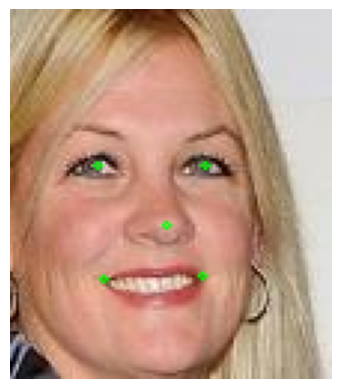

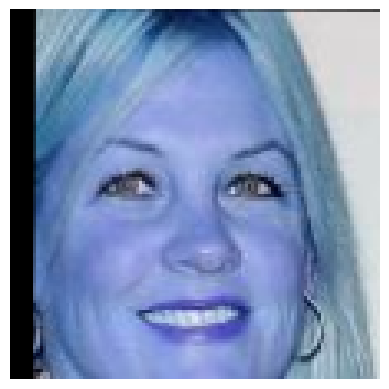

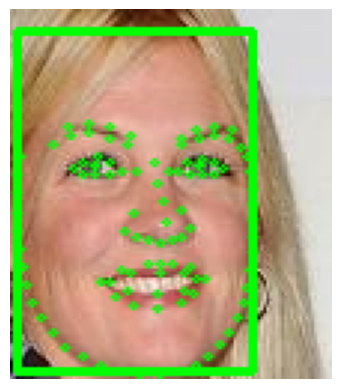

In [4]:
import cv2
import numpy as np
import insightface
from insightface.app import FaceAnalysis
from matplotlib import pyplot as plt
from insightface.utils import face_align

# Initialize FaceAnalysis and specify providers
app = FaceAnalysis(providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(128, 128))

# Load the image
img = cv2.imread('../data/raw/fiw/train/train-faces/F1005/MID2/P13044_face0.jpg')

# Detect faces in the image
faces = app.get(img)
print(f"Number of faces detected: {len(faces)}")

# Define color for landmarks (BGR format)
color = (0, 255, 0)  # Green

# Loop over detected faces
for idx, face in enumerate(faces):
    print(f"Face {idx+1}:")
    print(f"Age: {face.age}")
    print(f"Genders: {face.sex}")
    print(f"Embedding shape: {face.embedding.shape}")
    print(f"Detection score: {face.det_score}")
    print(f"Landmarks shape: {face.landmark_2d_106.shape}")
    print(f"kpss: {face.kps}")

        
    # Display the image with the 5-point landmarks visualized face.kps
    kps = face.kps.astype(int)
    img_copy = img.copy()
    for i in range(kps.shape[0]):
        p = tuple(kps[i])
        cv2.circle(img_copy, p, 1, color, 1, cv2.LINE_AA)  # Use the defined 'color' for circles
    
    # Convert image to RGB for matplotlib display
    img_rgb = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)

    # Display the image with landmarks
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axis
    plt.show()
        
    # align face
    aligned_face = face_align.norm_crop(img, kps)
    plt.imshow(aligned_face)
    plt.axis('off')
    plt.show()
    
    

    # Draw bounding box and landmarks on the original image for visualization
    x, y, w, h = face.bbox.astype(int)
    cv2.rectangle(img, (x, y), (w, h), (0, 255, 0), 2)  # Green box for the face
    lmk = face.landmark_2d_106.astype(int)
    for i in range(lmk.shape[0]):
        p = tuple(lmk[i])
        cv2.circle(img, p, 1, color, 1, cv2.LINE_AA)  # Use the defined 'color' for circles
    

# Convert image to RGB for matplotlib display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the original image with bounding boxes and landmarks
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.show()


In [5]:
import onnxruntime as ort

# Attempt to load the 2D landmark model
try:
    session = ort.InferenceSession('../models/models/buffalo_l/2d106det.onnx', providers=['CPUExecutionProvider'])
    print("2D landmark model loaded successfully.")
except Exception as e:
    print(f"Failed to load 2D landmark model: {e}")

# Attempt to load the 3D landmark model
try:
    session = ort.InferenceSession('../models/models/buffalo_l/1k3d68.onnx', providers=['CPUExecutionProvider'])
    print("3D landmark model loaded successfully.")
except Exception as e:
    print(f"Failed to load 3D landmark model: {e}")


2D landmark model loaded successfully.
3D landmark model loaded successfully.
